## Machine learning regressions
- Leer archivo `dataset1`
- Nuevas features
- Hacer regresiones

In [1]:
from datetime import datetime

import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from utils import plot
import utils

In [2]:
dataset = pd.read_csv("data/dataset1.csv", sep=";", parse_dates=["datetime_rainfall", "datetime_runoff"])

In [3]:
dataset.head()

datetime_rainfall  cangilones   mm  mm15min Fecha_str_rainfall  \
0 2023-05-18 00:00:49         0.0  0.0      0.0   2023-05-18 00:00   
1 2023-05-18 00:15:50         0.0  0.0      0.0   2023-05-18 00:15   
2 2023-05-18 00:30:52         0.0  0.0      0.0   2023-05-18 00:30   
3 2023-05-18 00:45:49         0.0  0.0      0.0   2023-05-18 00:45   
4 2023-05-18 01:00:51         0.0  0.0      0.0   2023-05-18 01:00   

      datetime_runoff  bateria  nivel  dist  Fecha_str_runoff  
0 2023-05-18 00:00:09       97      3   143  2023-05-18 00:00  
1 2023-05-18 00:15:11       97      3   143  2023-05-18 00:15  
2 2023-05-18 00:30:12       97      3   143  2023-05-18 00:30  
3 2023-05-18 00:45:13       97      2   144  2023-05-18 00:45  
4 2023-05-18 01:00:15       97      3   143  2023-05-18 01:00

## Nuevas features
- 4 columnas con los *mm15min* desfasados en 1, 2, 3 y 4 lugares
- 4 columnas con el *runoff* (nivel) 1, 2, 3 y 4 lugares desfasados
- 1 columna con la *precipitación acumulada* (*mm15min*) en las 4 lecturas previas

In [4]:
# columnas de mm15min desfasados
dataset["mm15min-1"] = dataset["mm15min"].shift(1)
dataset["mm15min-2"] = dataset["mm15min"].shift(2)
dataset["mm15min-3"] = dataset["mm15min"].shift(3)
dataset["mm15min-4"] = dataset["mm15min"].shift(4)

In [5]:
# columnas de runoff desfasados
dataset["nivel-1"] = dataset["nivel"].shift(1)
dataset["nivel-2"] = dataset["nivel"].shift(2)
dataset["nivel-3"] = dataset["nivel"].shift(3)
dataset["nivel-4"] = dataset["nivel"].shift(4)

In [6]:
# columna de mm15min acumulados de 3 lecturas previas
dataset['accumulated_rainfall'] = dataset['mm15min'].rolling(window=3, min_periods=1).sum()

In [7]:
dataset.head()

datetime_rainfall  cangilones   mm  mm15min Fecha_str_rainfall  \
0 2023-05-18 00:00:49         0.0  0.0      0.0   2023-05-18 00:00   
1 2023-05-18 00:15:50         0.0  0.0      0.0   2023-05-18 00:15   
2 2023-05-18 00:30:52         0.0  0.0      0.0   2023-05-18 00:30   
3 2023-05-18 00:45:49         0.0  0.0      0.0   2023-05-18 00:45   
4 2023-05-18 01:00:51         0.0  0.0      0.0   2023-05-18 01:00   

      datetime_runoff  bateria  nivel  dist  Fecha_str_runoff  mm15min-1  \
0 2023-05-18 00:00:09       97      3   143  2023-05-18 00:00        NaN   
1 2023-05-18 00:15:11       97      3   143  2023-05-18 00:15        0.0   
2 2023-05-18 00:30:12       97      3   143  2023-05-18 00:30        0.0   
3 2023-05-18 00:45:13       97      2   144  2023-05-18 00:45        0.0   
4 2023-05-18 01:00:15       97      3   143  2023-05-18 01:00        0.0   

   mm15min-2  mm15min-3  mm15min-4  nivel-1  nivel-2  nivel-3  nivel-4  \
0        NaN        NaN        NaN      NaN      NaN      NaN      NaN   
1        NaN        NaN        NaN      3.0      NaN      NaN      NaN   
2        0.0        NaN        NaN      3.0      3.0      NaN      NaN   
3        0.0        0.0        NaN      3.0      3.0      3.0      NaN   
4        0.0        0.0        0.0      2.0      3.0      3.0      3.0   

   accumulated_rainfall  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0

In [8]:
X = dataset[["mm15min", "mm15min-1", "mm15min-2", "mm15min-3", "mm15min-4", "accumulated_rainfall"]].copy()
y = dataset['nivel'].copy()

In [9]:
X.drop(0, inplace = True)
X.drop(1, inplace = True)
X.drop(2, inplace = True)
X.drop(3, inplace = True)

In [10]:
y.drop(0, inplace=True)
y.drop(1, inplace=True)
y.drop(2, inplace=True)
y.drop(3, inplace=True)

In [11]:
X

mm15min  mm15min-1  mm15min-2  mm15min-3  mm15min-4  \
4         0.0        0.0        0.0        0.0        0.0   
5         0.0        0.0        0.0        0.0        0.0   
6         0.0        0.0        0.0        0.0        0.0   
7         0.0        0.0        0.0        0.0        0.0   
8         0.0        0.0        0.0        0.0        0.0   
...       ...        ...        ...        ...        ...   
1390      0.0        0.0        0.0        0.0        0.0   
1391      0.0        0.0        0.0        0.0        0.0   
1392      0.0        0.0        0.0        0.0        0.0   
1393      0.0        0.0        0.0        0.0        0.0   
1394      0.0        0.0        0.0        0.0        0.0   

      accumulated_rainfall  
4                      0.0  
5                      0.0  
6                      0.0  
7                      0.0  
8                      0.0  
...                    ...  
1390                   0.0  
1391                   0.0  
1392                   0.0  
1393                   0.0  
1394                   0.0  

[1391 rows x 6 columns]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [13]:
model_RF = RandomForestRegressor(n_estimators=100, random_state=42)  # Ajusta el número de árboles (n_estimators) según tus necesidades
model_RF.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [14]:
y_pred = model_RF.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R^2: {r2}')

MSE: 12.27735328888548
R^2: 0.004002119024318795


In [15]:
y_pred_RF = model_RF.predict(X)

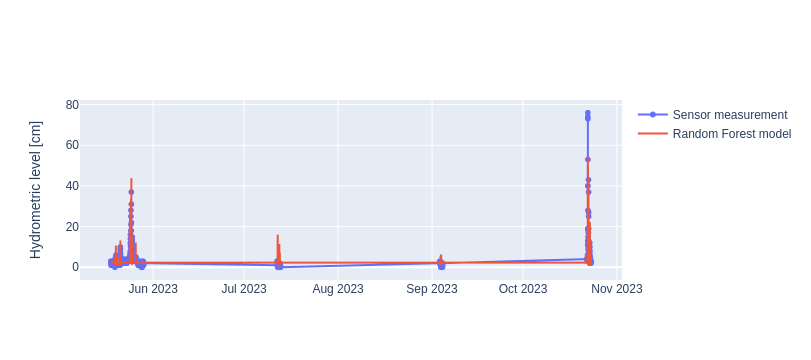

In [20]:
f1 = plot(x=dataset.datetime_runoff[4:], y=dataset.nivel[4:], label="Sensor measurement")
f1.add_trace(go.Scattergl(x=dataset.datetime_runoff[4:], y=y_pred_RF, name="Random Forest model", mode="lines"))
f1.update_layout(yaxis_title="Hydrometric level [cm]")

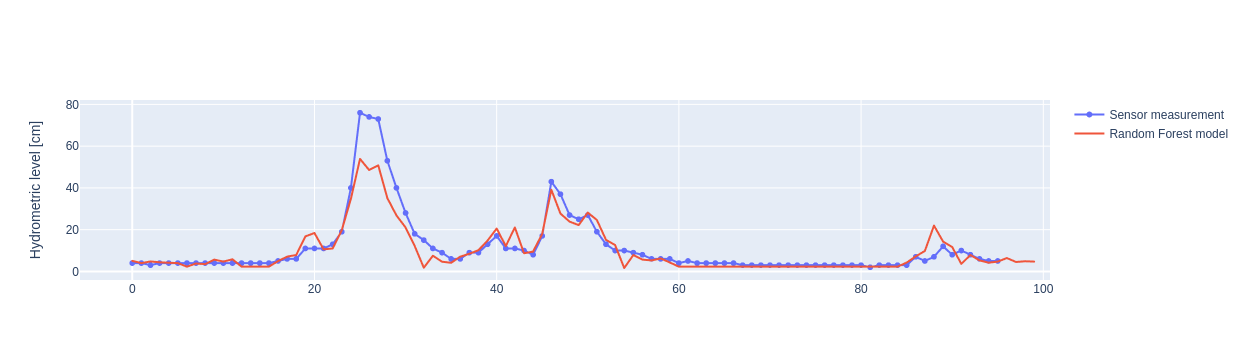

In [30]:
f1 = plot(y=dataset.nivel[1264:1360], label="Sensor measurement")
f1.add_trace(go.Scattergl(y=y_pred_RF[1260:1360], name="Random Forest model", mode="lines"))
f1.update_layout(yaxis_title="Hydrometric level [cm]")

In [31]:
y_true = dataset.nivel[1264:1360]
y_pred = y_pred_RF[1260:1356]

In [36]:
import numpy as np
# Calcular el RMSE
range_y_true = np.max(y_true) - np.min(y_true)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
rmse_relative = (rmse / range_y_true) * 100
print(f'Relative RMSE: {rmse_relative}')

# Calcular R2
r2 = r2_score(y_true, y_pred)
print(f'R-squared (R2): {r2}')

RMSE: 7.89344515786475
R-squared (R2): 0.8457169970778278


## Test con data nueva

In [31]:
lluvia_test = pd.read_csv("data/lluvia_test_muni_estacion_zuviria.CSV", sep=";", parse_dates=["datetime"], comment="#")

# paso cangilones a mm
lluvia_test["mm15min"] = lluvia_test["cangilones"]*0.25
lluvia_test.head()

datetime  cangilones  mm15min
0 2023-11-01 00:00:00           0      0.0
1 2023-11-01 00:15:00           0      0.0
2 2023-11-01 00:30:00           0      0.0
3 2023-11-01 00:45:00           0      0.0
4 2023-11-01 01:00:00           0      0.0

In [32]:
# agrego columnas de features
lluvia_test = utils.add_features(lluvia_test)

In [34]:
X2 = lluvia_test[["mm15min", "mm15min-1", "mm15min-2", "mm15min-3", "mm15min-4", "accumulated_rainfall"]]

In [35]:
y_pred_RF2 = model_RF.predict(X2)

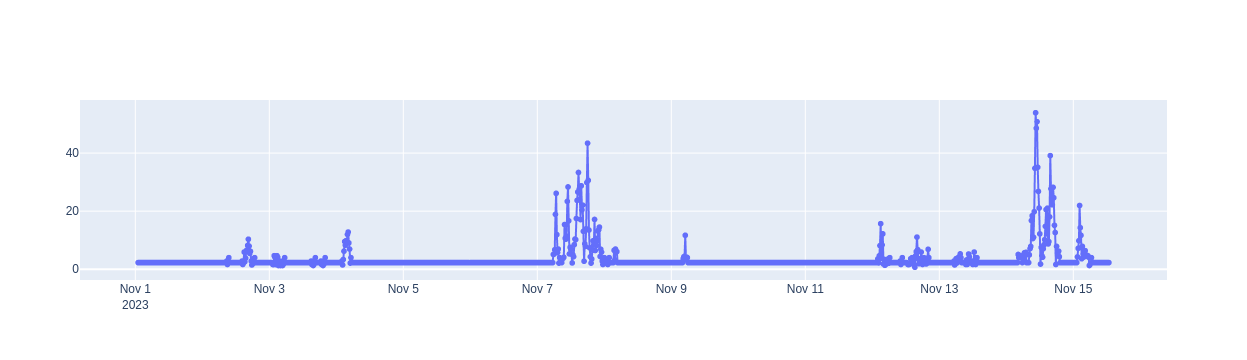

In [38]:
plot(x=lluvia_test.datetime, y=y_pred_RF, label="RF")